# Pneumonia detection using X-Ray images and Deep Learning

- Pneumonia is an infection that inflames the alveoli in one or both lungs. The alveoli may fill with pus, causing cough with phlegm or pus, fever, chills, and difficulty breathing. In general, pneumonia is caused by a virus, a bacteria or fungi.

- Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

- Chest X-Ray images can be useful in the diagnosis of Pneumonia. A doctor can diagnose it, know the extent and the location of the infection by looking at an X-Ray image withing a few seconds or minutes. 

- The aim of this work is to automatize the detection of Pneumonia by using Deep Learning algorithms and only X-Ray images. Different techniques will be used in order to achieve the best possible results. If this task can be sucessfully achieved by a machine, then it will help doctors to save a lot of time that could be used in other actions.

## Exploratory Analysis

First let's take a look to the available data.

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # plots

from PIL import Image # image
from keras.preprocessing.image import ImageDataGenerator # pre-processing
from keras import layers, models, optimizers # modeling

In [11]:
# Path to data
base_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

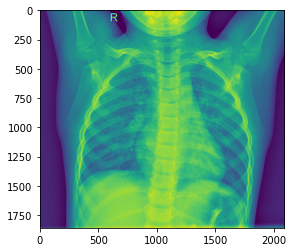

In [12]:
imagen = plt.imread(os.path.join(train_dir, 'NORMAL/IM-0115-0001.jpeg'))
plt.imshow(imagen)

In [13]:
# Loading images from directory using generator
train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary' # We only have 2 classes, so class_mode will be 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
# Sanity check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


## Baseline Model - Convolutional Neural Network

In [15]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=14,
                              validation_data=val_generator,
                              validation_steps=4)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-21 09:50:00.744164: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/14


2022-09-21 09:50:03.612668: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 51s 415ms/step - loss: 0.3875 - acc: 0.8332 - val_loss: 0.9179 - val_acc: 0.6250
Epoch 2/14
100/100 [==============================] - 37s 373ms/step - loss: 0.1813 - acc: 0.9360 - val_loss: 0.9075 - val_acc: 0.6250
Epoch 3/14
100/100 [==============================] - 34s 341ms/step - loss: 0.1398 - acc: 0.9475 - val_loss: 0.3248 - val_acc: 0.9375
Epoch 4/14
100/100 [==============================] - 31s 303ms/step - loss: 0.1251 - acc: 0.9540 - val_loss: 0.5652 - val_acc: 0.7500
Epoch 5/14
100/100 [==============================] - 30s 303ms/step - loss: 0.1088 - acc: 0.9614 - val_loss: 0.2668 - val_acc: 0.9375
Epoch 6/14
100/100 [==============================] - 29s 294ms/step - loss: 0.0891 - acc: 0.9685 - val_loss: 0.1997 - val_acc: 0.9375
Epoch 7/14
100/100 [==============================] - 27s 264ms/step - loss: 0.0876 - acc: 0.9650 - val_loss: 1.0732 - val_acc: 0.6250
Epoch 8/14
100/100 [==============================] - 28s 281ms/st

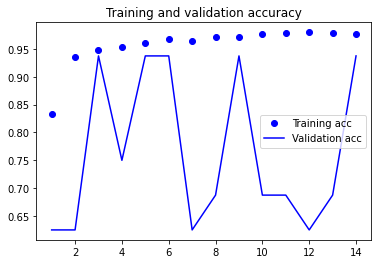

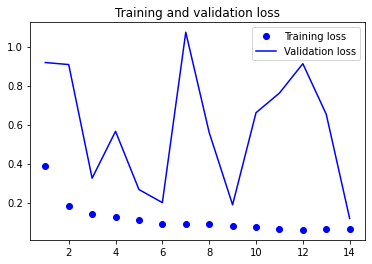

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.7948718070983887


In [23]:
model.save('/kaggle/working/baseline_model.h5')

We achieved an accuracy of **80.0%** in the test set.

## Image Augmentation

We will apply data augmentation in order to increase the size of the training set. For that, we will create a new Train ImageDataGenerator object.

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary' # We only have 2 classes, so class_mode will be 'binary'
)

Found 5216 images belonging to 2 classes.


In [25]:
model2 = models.Sequential() 
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu')) 
model2.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history2 = model2.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=8,
                                validation_data=val_generator,
                                validation_steps=4)

Epoch 1/8
100/100 [==============================] - 49s 487ms/step - loss: 0.4927 - acc: 0.7765 - val_loss: 1.1294 - val_acc: 0.5000
Epoch 2/8
100/100 [==============================] - 49s 486ms/step - loss: 0.3786 - acc: 0.8141 - val_loss: 0.7236 - val_acc: 0.5625
Epoch 3/8
100/100 [==============================] - 49s 490ms/step - loss: 0.3621 - acc: 0.8285 - val_loss: 0.8187 - val_acc: 0.5625
Epoch 4/8
100/100 [==============================] - 49s 491ms/step - loss: 0.3362 - acc: 0.8460 - val_loss: 0.7799 - val_acc: 0.5625
Epoch 5/8
100/100 [==============================] - 49s 486ms/step - loss: 0.3162 - acc: 0.8555 - val_loss: 1.1910 - val_acc: 0.5625
Epoch 6/8
100/100 [==============================] - 48s 475ms/step - loss: 0.2943 - acc: 0.8692 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 7/8
100/100 [==============================] - 49s 489ms/step - loss: 0.3190 - acc: 0.8592 - val_loss: 0.6131 - val_acc: 0.6250
Epoch 8/8
100/100 [==============================] - 48s 482ms

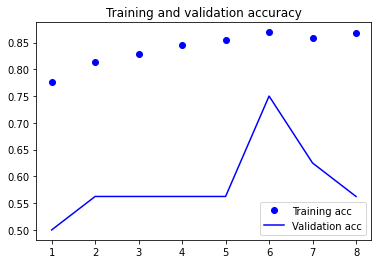

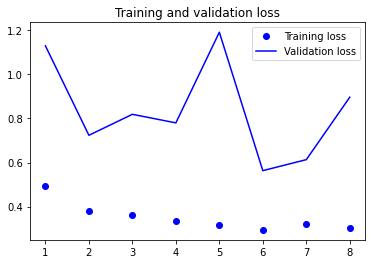

In [27]:
acc = history2.history['acc']
val_acc = history2.history['val_acc'] 
loss = history2.history['loss'] 
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.8605769276618958


In [29]:
model.save('/kaggle/working/cnn_augmented.h5')

Now, we got an accuracy of **86.3%** in the test set

## Adding Dropout

Now, let's add some dropout layers to the previous network in order to reduce overfitting.

In [30]:
model3 = models.Sequential() 
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(512, activation='relu')) 
model3.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history3 = model3.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=9,
                                validation_data=val_generator,
                                validation_steps=4)

Epoch 1/9
100/100 [==============================] - 49s 484ms/step - loss: 0.5240 - acc: 0.7485 - val_loss: 0.9334 - val_acc: 0.5000
Epoch 2/9
100/100 [==============================] - 49s 492ms/step - loss: 0.3981 - acc: 0.8101 - val_loss: 0.7305 - val_acc: 0.5625
Epoch 3/9
100/100 [==============================] - 48s 475ms/step - loss: 0.3535 - acc: 0.8211 - val_loss: 0.7332 - val_acc: 0.5625
Epoch 4/9
100/100 [==============================] - 49s 489ms/step - loss: 0.3338 - acc: 0.8450 - val_loss: 0.7459 - val_acc: 0.5625
Epoch 5/9
100/100 [==============================] - 49s 490ms/step - loss: 0.3200 - acc: 0.8595 - val_loss: 0.5969 - val_acc: 0.6875
Epoch 6/9
100/100 [==============================] - 49s 485ms/step - loss: 0.3240 - acc: 0.8510 - val_loss: 0.6593 - val_acc: 0.5625
Epoch 7/9
100/100 [==============================] - 49s 486ms/step - loss: 0.3062 - acc: 0.8635 - val_loss: 0.5228 - val_acc: 0.6875
Epoch 8/9
100/100 [==============================] - 48s 476ms

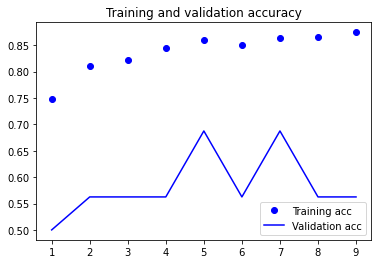

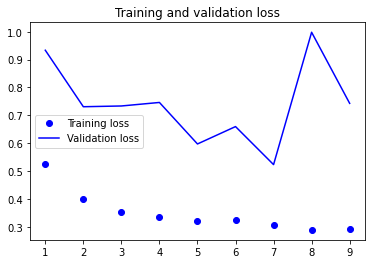

In [32]:
acc = history3.history['acc']
val_acc = history3.history['val_acc'] 
loss = history3.history['loss'] 
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
test_loss, test_acc = model3.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.8477563858032227


In [34]:
model.save('/kaggle/working/model.h5')

We got an accuracy of **89.4%**.

# Transfer Learning

With the previous solutions, the maximum accuracy we reached was **89.4%**. Now, let's try something different. We will use a pre-trained neural network to see if we get better results.